# 13. Statistics
https://docs.scipy.org/doc/scipy/reference/tutorial/index.html  
https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html

In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Introduction
In this tutorial we discuss many, but certainly not all, features of scipy.stats. The intention here is to provide a user with a working knowledge of this package. We refer to the reference manual for further details.

Note: This documentation is work in progress.

## Random Variables
There are two general distribution classes that have been implemented for encapsulating continuous random variables and discrete random variables . Over 80 continuous ***random variables (RVs)*** and 10 discrete random variables have been implemented using these classes. Besides this, new routines and distributions can easily added by the end user. (If you create one, please contribute it).

All of the statistics functions are located in the sub-package ***scipy.stats*** and a fairly complete listing of these functions can be obtained using ***info(stats)***. The list of the random variables available can also be obtained from the docstring for the stats sub-package.

In the discussion below we mostly focus on ***continuous RVs***. Nearly all applies to discrete variables also, but we point out some differences here: Specific Points for Discrete Distributions.

In the code samples below we assume that the scipy.stats package is imported as
> from scipy import stats

and in some cases we assume that individual objects are imported as
> from scipy.stats import norm

In [11]:
from scipy import stats
from scipy.stats import norm

info(stats)

Statistical functions (:mod:`scipy.stats`)

.. module:: scipy.stats

This module contains a large number of probability distributions as
well as a growing library of statistical functions.

Each univariate distribution is an instance of a subclass of `rv_continuous`
(`rv_discrete` for discrete distributions):

.. autosummary::
   :toctree: generated/

   rv_continuous
   rv_discrete

Continuous distributions

.. autosummary::
   :toctree: generated/

   alpha             -- Alpha
   anglit            -- Anglit
   arcsine           -- Arcsine
   beta              -- Beta
   betaprime         -- Beta Prime
   bradford          -- Bradford
   burr              -- Burr (Type III)
   burr12            -- Burr (Type XII)
   cauchy            -- Cauchy
   chi               -- Chi
   chi2              -- Chi-squared
   cosine            -- Cosine
   dgamma            -- Double Gamma
   dweibull          -- Double Weibull
   erlang            -- Erlang
   expon             -- Exponential
   exp

### Common Methods

The main public methods for continuous RVs are:

- rvs: Random Variates
- pdf: Probability Density Function
- cdf: Cumulative Distribution Function
- sf: Survival Function (1-CDF)
- ppf: Percent Point Function (Inverse of CDF)
- isf: Inverse Survival Function (Inverse of SF)
- stats: Return mean, variance, (Fisher’s) skew, or (Fisher’s) kurtosis
- moment: non-central moments of the distribution

Let’s take a normal RV as an example. 

In [12]:
norm.cdf(0)  # cdf: location = 0, what the cumulated percentage?

0.5

To compute the cdf at a number of points, we can pass a list or a numpy array.

In [15]:
norm.cdf(np.array([-1., 0, 1]))

array([ 0.15865525,  0.5       ,  0.84134475])

Thus, the basic methods such as ***pdf, cdf***, and so on are vectorized with np.vectorize.

Other generally useful methods are supported too:

In [16]:
norm.mean(), norm.std(), norm.var()

(0.0, 1.0, 1.0)

In [17]:
norm.stats(moments = "mv")

(array(0.0), array(1.0))

In [18]:
norm.stats?

To find the median of a distribution we can use the percent point function ***ppf***, which is the inverse of the cdf:

In [19]:
norm.ppf(0.5)  # percentage = 0.5, what's the location?

0.0

To generate a sequence of random variates, use the ***size*** keyword argument:

In [120]:
norm.rvs(size = 3)

array([ 0.12471295, -0.32279481,  0.84167471])

Note that drawing random numbers relies on generators from numpy.random package. In the example above, the specific stream of random numbers is not reproducible across runs. To achieve reproducibility, you can explicitly seed a global variable

In [108]:
np.random.seed(1234)
norm.rvs(size = 3)

array([ 0.47143516, -1.19097569,  1.43270697])

Relying on a global state is not recommended though. A better way is to use the random_state parameter which accepts an instance of numpy.random.RandomState class, or an integer which is then used to seed an internal RandomState object:

In [130]:
norm.rvs(size=5, random_state=1234)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873])

Don’t think that norm.rvs(5) generates 5 variates:

In [131]:
norm.rvs(5)

7.3909605154630329

Here, 5 with no keyword is being interpreted as the first possible keyword argument, ***loc***, which is the first of a pair of keyword arguments taken by all continuous distributions. This brings us to the topic of the next subsection.

### Shifting and Scaling

All continuous distributions take ***loc*** and ***scale*** as keyword parameters to adjust the location and scale of the distribution, e.g. for the standard normal distribution the location is the ***mean*** and the scale is the ***standard deviation***.

In [135]:
norm.stats(loc = 3, scale = 4, moments = 'mv')

(array(3.0), array(16.0))

In many cases the standardized distribution for a random variable X is obtained through the transformation ***(X - loc) / scale***. The default values are loc = 0 and scale = 1.

Smart use of loc and scale can help modify the standard distributions in many ways. To illustrate the scaling further, the cdf of an exponentially distributed RV with mean $1/\lambda$ is given by
>$F(x) = 1 - \exp(-\lambda x)$

By applying the scaling rule above, it can be seen that by taking scale  = 1./lambda we get the proper scale.

In [136]:
from scipy.stats import expon
expon.mean(scale = 3.)

3.0

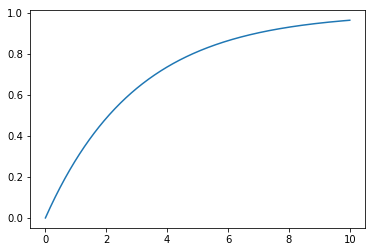

In [146]:
l = 1./3.
scale = 1./l

x = np.linspace(0, 10, 500)
plot(x, 1 - np.exp(-l*x))

#### Note
Distributions that take shape parameters may require more than simple application of loc and/or scale to achieve the desired form. For example, the distribution of 2-D vector lengths given a constant vector of length RR perturbed by independent N(0, σ2) deviations in each component is rice(R/σ, scale= σ). The first argument is a shape parameter that needs to be scaled along with x.

The uniform distribution is also interesting:

In [147]:
from scipy.stats import uniform
uniform.cdf([0, 1, 2, 3, 4, 5], loc = 1, scale = 4)

array([ 0.  ,  0.  ,  0.25,  0.5 ,  0.75,  1.  ])

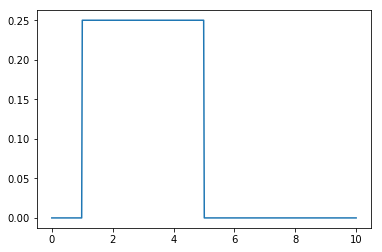

In [154]:
x = np.linspace(0, 10, 500)
y = uniform.pdf(x, loc = 1, scale = 4)
plot(x,y)

Finally, recall from the previous paragraph that we are left with the problem of the meaning of norm.rvs(5). As it turns out, calling a distribution like this, the first argument, i.e., the 5, gets passed to set the ***loc*** parameter. Let’s see:

In [156]:
np.mean(norm.rvs(5, size = 500))

4.9992921110578186

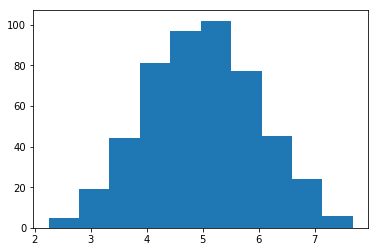

In [167]:
N = 500 
# x = np.linspace(0, 10, N)
y = norm.rvs(loc = 5, size = N)
plt.hist(y);

Thus, to explain the output of the example of the last section: norm.rvs(5) generates a single normally distributed random variate with mean loc=5, because of the default size=1.

We recommend that you set loc and scale parameters explicitly, by passing the values as keywords rather than as arguments. Repetition can be minimized when calling more than one method of a given RV by using the technique of Freezing a Distribution, as explained below.

### Shape Parameters

While a general continuous random variable can be shifted and scaled with the loc and scale parameters, some distributions require additional shape parameters. For instance, the ***gamma distribution***, with density
>$\gamma(x, a) = \frac{\lambda (\lambda x)^{a-1}}{\Gamma(a)} e^{-\lambda x}\;,$

requires the shape parameter ***a***. Observe that setting λ can be obtained by setting the ***scale*** keyword to ***1/λ***.

Let’s check the number and name of the shape parameters of the gamma distribution. (We know from the above that this should be 1.)

In [164]:
from scipy.stats import gamma
gamma.numargs

1

In [166]:
gamma.shapes

'a'

Now we set the value of the shape variable to 1 to obtain the exponential distribution, so that we compare easily whether we get the results we expect.

In [169]:
g = gamma(a = 1, scale = 2)
g

In [181]:
m, v = g.stats(moments = 'mv')
m, v

(array(2.0), array(4.0))

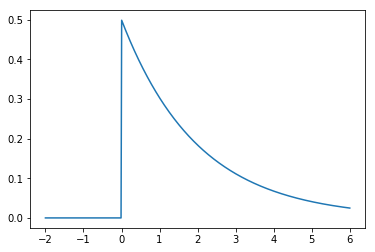

In [189]:
x = np.linspace(m - 2. * np.sqrt(v), m + 2. * np.sqrt(v), 500)
y = g.pdf(x)
plot(x, y)

## Freezing a Distribution

Passing the loc and scale keywords time and again can become quite bothersome. The concept of freezing a RV is used to solve such problems.

In [186]:
rv = gamma(a = 1, scale = 2)
rv

By using rv we no longer have to include the scale or the shape parameters anymore. Thus, distributions can be used in one of two ways, either by passing all distribution parameters to each method call (such as we did earlier) or by freezing the parameters for the instance of the distribution. Let us check this:

In [187]:
rv.mean(), rv.std()

(2.0, 2.0)

This is indeed what we should get.

### Broadcasting

The basic methods ***pdf*** and so on satisfy the usual numpy broadcasting rules. For example, we can calculate the critical values for the upper tail of the t distribution for different probabilities and degrees of freedom.

In [191]:
stats.t.isf([0.1, 0.05, 0.01], [[10], [11]])

array([[ 1.37218364,  1.81246112,  2.76376946],
       [ 1.36343032,  1.79588482,  2.71807918]])

Here, the first row are the critical values for 10 degrees of freedom and the second row for 11 ***degrees of freedom (d.o.f.)***. Thus, the broadcasting rules give the same result of calling isf twice:

In [192]:
stats.t.isf([0.1, 0.05, 0.01], 10)

array([ 1.37218364,  1.81246112,  2.76376946])

In [193]:
stats.t.isf([0.1, 0.05, 0.01], 11)

array([ 1.36343032,  1.79588482,  2.71807918])

If the array with probabilities, i.e., [0.1, 0.05, 0.01] and the array of degrees of freedom i.e., [10, 11, 12], have the same array shape, then element wise matching is used. As an example, we can obtain the 10% tail for 10 d.o.f., the 5% tail for 11 d.o.f. and the 1% tail for 12 d.o.f. by calling

In [194]:
stats.t.isf([0.1, 0.05, 0.01], [10, 11, 12])

array([ 1.37218364,  1.79588482,  2.68099799])

### Specific Points for Discrete Distributions

Discrete distribution have mostly the same basic methods as the continuous distributions. However pdf is replaced the ***probability mass function pmf***, no estimation methods, such as fit, are available, and scale is not a valid keyword parameter. The location parameter, keyword loc can still be used to shift the distribution.

The computation of the ***cdf*** requires some extra attention. In the case of continuous distribution the cumulative distribution function is in most standard cases strictly monotonic increasing in the bounds (a,b) and has therefore a unique inverse. The cdf of a discrete distribution, however, is a ***step function***, hence the ***inverse cdf***, i.e., the percent point function, requires a different definition:

ppf(q) = min{x : cdf(x) >= q, x integer}

For further info, see the docs here.

We can look at the ***hypergeometric*** distribution as an example

In [195]:
from scipy.stats import hypergeom
[M, n, N] = [20, 7, 12]
M, n, N

(20, 7, 12)

If we use the cdf at some integer points and then evaluate the ppf at those cdf values, we get the initial integers back, for example

In [196]:
x = np.arange(4) * 2
x

array([0, 2, 4, 6])

In [198]:
prb = hypergeom.cdf(x, M, n, N)
prb

array([  1.03199174e-04,   5.21155831e-02,   6.08359133e-01,
         9.89783282e-01])

In [199]:
hypergeom.ppf(prb, M, n, N)

array([ 0.,  2.,  4.,  6.])

If we use values that are not at the kinks of the cdf step function, we get the next higher integer back:

In [200]:
hypergeom.ppf(prb + 1e-8, M, n, N)

array([ 1.,  3.,  5.,  7.])

In [201]:
hypergeom.ppf(prb - 1e-8, M, n, N)

array([ 0.,  2.,  4.,  6.])

### Fitting Distributions

The main additional methods of the not frozen distribution are related to the estimation of distribution parameters:

- **fit: maximum likelihood estimation of distribution parameters, including location
and scale**

- fit_loc_scale: estimation of location and scale when shape parameters are given

- nnlf: negative log likelihood function

- expect: Calculate the expectation of a function against the pdf or pmf


### Performance Issues and Cautionary Remarks

The performance of the individual methods, in terms of speed, varies widely by distribution and method. The results of a method are obtained in one of two ways: either by explicit calculation, or by a generic algorithm that is independent of the specific distribution.

**Explicit calculation**, on the one hand, requires that the method is directly specified for the given distribution, either through analytic formulas or through special functions in scipy.special or numpy.random for rvs. These are usually relatively fast calculations.

The **generic methods**, on the other hand, are used if the distribution does not specify any explicit calculation. To **define a distribution, only one of pdf or cdf is necessary**; all other methods can be derived using numeric integration and root finding. However, these indirect methods can be very slow. As an example, rgh = stats.gausshyper.rvs(0.5, 2, 2, 2, size=100) creates random variables in a very indirect way and takes about 19 seconds for 100 random variables on my computer, while one million random variables from the standard normal or from the t distribution take just above one second.

### Remaining Issues

The distributions in scipy.stats have recently been corrected and improved and gained a considerable test suite, however a few issues remain:

- the distributions have been tested over some range of parameters, however in some corner ranges, a few incorrect results may remain.
- the maximum likelihood estimation in ***fit*** does not work with default starting parameters for all distributions and the user needs to supply good starting parameters. Also, for some distribution using a maximum likelihood estimator might inherently not be the best choice.

## Building Specific Distributions
The next examples shows how to build your own distributions. Further examples show the usage of the distributions and some statistical tests.

### Making a Continuous Distribution, i.e., Subclassing rv_continuous

Making continuous distributions is fairly simple.

In [204]:
from scipy import stats
class deterministic_gen(stats.rv_continuous):
    def _cdf(self, x):
        return np.where(x<0, 0., 1.)
    
    def _stats(self):
        return 0., 0., 0., 0.
    
deterministic = deterministic_gen(name = 'deterministric')
deterministic.cdf(np.arange(-3, 3, 0.5))

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.])

Interestingly, the pdf is now computed automatically:

In [206]:
deterministic.pdf(np.arange(-3, 3, 0.5))

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         5.83333333e+04,   4.16333634e-12,   4.16333634e-12,
         4.16333634e-12,   4.16333634e-12,   4.16333634e-12])

Be aware of the performance issues mentions in Performance Issues and Cautionary Remarks. The computation of unspecified common methods can become very slow, since only general methods are called which, by their very nature, cannot use any specific information about the distribution. Thus, as a cautionary example:

In [209]:
from scipy.integrate import quad
quad(deterministic.pdf, -1e-1, 1e-1)

(4.163336342344337e-13, 0.0)

But this is not correct: the ***integral over this pdf should be 1***. Let’s make the integration interval smaller:

In [210]:
quad(deterministic.pdf, -1e-3, 1e-3)  # warning removed

/home/wei/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


(1.000076872229173, 0.0010625571718182458)

This looks better. However, the problem originated from the fact that the pdf is not specified in the class definition of the deterministic distribution.

### Subclassing rv_discrete

In the following we use ***stats.rv_discrete*** to generate a discrete distribution that has the probabilities of the truncated normal for the intervals centered around the integers.

#### General Info

From the docstring of rv_discrete, help(stats.rv_discrete),
>“You can construct an arbitrary discrete rv where P{X=xk} = pk by passing to the rv_discrete initialization method (through the values= keyword) a tuple of sequences (xk, pk) which describes only those values of X (xk) that occur with nonzero probability (pk).”

Next to this, there are some further requirements for this approach to work:

- The keyword name is required.
- The support points of the distribution xk have to be integers.
- The number of significant digits (decimals) needs to be specified.

In fact, if the last two requirements are not satisfied an exception may be raised or the resulting numbers may be incorrect.

#### An Example

Let’s do the work. First

In [212]:
npoints = 20   # number of integer support points of the distribution minus 1
npointsh = npoints / 2
npointsf = float(npoints)
nbound = 4   # bounds for the truncated normal
normbound = (1+1/npointsf) * nbound   # actual bounds of truncated normal
grid = np.arange(-npointsh, npointsh+2, 1)   # integer grid
gridlimitsnorm = (grid-0.5) / npointsh * nbound   # bin limits for the truncnorm
gridlimits = grid - 0.5   # used later in the analysis
grid = grid[:-1]
probs = np.diff(stats.truncnorm.cdf(gridlimitsnorm, -normbound, normbound))
gridint = grid

And finally we can subclass rv_discrete:

In [213]:
normdiscrete = stats.rv_discrete(values=(gridint, np.round(probs, decimals=7)),
                                 name='normdiscrete')

Now that we have defined the distribution, we have access to all common methods of discrete distributions.

In [214]:
print('mean = %6.4f, variance = %6.4f, skew = %6.4f, kurtosis = %6.4f'% \
      normdiscrete.stats(moments =  'mvsk'))

mean = -0.0000, variance = 6.3302, skew = 0.0000, kurtosis = -0.0076


<Container object of 21 artists>

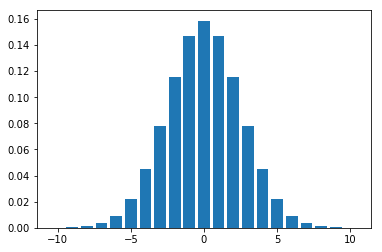

In [223]:
y = normdiscrete.pmf(grid)
plt.bar(grid, y)

In [224]:
nd_std = np.sqrt(normdiscrete.stats(moments='v'))
nd_std

2.5159815977069466

#### Testing the Implementation

Let’s generate a random sample and compare observed frequencies with the probabilities.

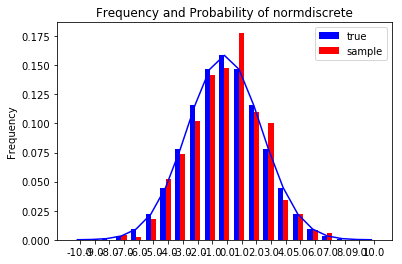

In [229]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy import stats

# npoints = 20 # number of integer support points of the distribution minus 1
# npointsh = npoints / 2
# npointsf = float(npoints)
# nbound = 4 #bounds for the truncated normal
# normbound = (1 + 1 / npointsf) * nbound #actual bounds of truncated normal
# grid = np.arange(-npointsh, npointsh+2, 1) #integer grid
# gridlimitsnorm = (grid-0.5) / npointsh * nbound #bin limits for the truncnorm
# gridlimits = grid - 0.5
# grid = grid[:-1]
# probs = np.diff(stats.truncnorm.cdf(gridlimitsnorm, -normbound, normbound))
# gridint = grid
# normdiscrete = stats.rv_discrete(
#                         values=(gridint, np.round(probs, decimals=7)),
#                         name='normdiscrete')


n_sample = 500
np.random.seed(87655678) #fix the seed for replicability
rvs = normdiscrete.rvs(size=n_sample)
rvsnd=rvs
f,l = np.histogram(rvs, bins=gridlimits)
sfreq = np.vstack([gridint, f, probs*n_sample]).T
fs = sfreq[:,1] / float(n_sample)
ft = sfreq[:,2] / float(n_sample)
nd_std = np.sqrt(normdiscrete.stats(moments='v'))

ind = gridint  # the x locations for the groups
width = 0.35       # the width of the bars

plt.subplot(111)
rects1 = plt.bar(ind, ft, width, color='b')
rects2 = plt.bar(ind+width, fs, width, color='r')
normline = plt.plot(ind+width/2.0, stats.norm.pdf(ind, scale=nd_std),
                    color='b')

plt.ylabel('Frequency')
plt.title('Frequency and Probability of normdiscrete')
plt.xticks(ind+width, ind)
plt.legend((rects1[0], rects2[0]), ('true', 'sample'))

plt.show()

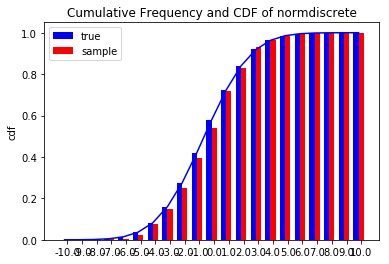

In [231]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

npoints = 20 # number of integer support points of the distribution minus 1
npointsh = npoints / 2
npointsf = float(npoints)
nbound = 4 #bounds for the truncated normal
normbound = (1 + 1 / npointsf) * nbound #actual bounds of truncated normal
grid = np.arange(-npointsh, npointsh+2,1) #integer grid
gridlimitsnorm = (grid - 0.5) / npointsh * nbound #bin limits for the truncnorm
gridlimits = grid - 0.5
grid = grid[:-1]
probs = np.diff(stats.truncnorm.cdf(gridlimitsnorm, -normbound, normbound))
gridint = grid
normdiscrete = stats.rv_discrete(
                        values=(gridint, np.round(probs, decimals=7)),
                        name='normdiscrete')

n_sample = 500
np.random.seed(87655678) #fix the seed for replicability
rvs = normdiscrete.rvs(size=n_sample)
rvsnd = rvs
f,l = np.histogram(rvs,bins=gridlimits)
sfreq = np.vstack([gridint,f,probs*n_sample]).T
fs = sfreq[:,1] / float(n_sample)
ft = sfreq[:,2] / float(n_sample)
fs = sfreq[:,1].cumsum() / float(n_sample)
ft = sfreq[:,2].cumsum() / float(n_sample)
nd_std = np.sqrt(normdiscrete.stats(moments='v'))


ind = gridint  # the x locations for the groups
width = 0.35   # the width of the bars

plt.figure()
plt.subplot(111)
rects1 = plt.bar(ind, ft, width, color='b')
rects2 = plt.bar(ind+width, fs, width, color='r')
normline = plt.plot(ind+width/2.0, stats.norm.cdf(ind+0.5,scale=nd_std),
                    color='b')

plt.ylabel('cdf')
plt.title('Cumulative Frequency and CDF of normdiscrete')
plt.xticks(ind+width, ind)
plt.legend((rects1[0], rects2[0]), ('true', 'sample'))

plt.show()

Next, we can test, whether our sample was generated by our normdiscrete distribution. This also verifies whether the random numbers are generated correctly.

The chisquare test requires that there are a minimum number of observations in each bin. We combine the tail bins into larger bins so that they contain enough observations.

In [232]:
f2 = np.hstack([f[:5].sum(), f[5:-5], f[-5:].sum()])
p2 = np.hstack([probs[:5].sum(), probs[5:-5], probs[-5:].sum()])
ch2, pval = stats.chisquare(f2, p2*n_sample)

'chisquare for normdiscrete: chi2 = %6.3f pvalue = %6.4f' % (ch2, pval)

'chisquare for normdiscrete: chi2 = 12.466 pvalue = 0.4090'

The pvalue in this case is high, so we can be quite confident that our random sample was actually generated by the distribution.

## Analysing One Sample
First, we create some random variables. We set a seed so that in each run we get identical results to look at. As an example we take a sample from the Student t distribution:

In [234]:
np.random.seed(282629734)
x = stats.t.rvs(10, size=1000)

Here, we set the required shape parameter of the t distribution, which in statistics corresponds to the ***degrees of freedom, to 10***. Using size=1000 means that our sample consists of 1000 independently drawn (pseudo) random numbers. Since we did not specify the keyword arguments loc and scale, those are set to their default values zero and one.

### Descriptive Statistics¶

x is a numpy array, and we have direct access to all array methods, e.g.

In [237]:
x.min(), x.max()  # equivalent to np.max(x), np.min(x)

(-3.7897557242248197, 5.2632773298071651)

In [236]:
x.mean(), x.var() # equivalent to np.mean(x), np.var(x)

(0.014061066398468422, 1.2889938620792849)

How do the some sample properties compare to their theoretical counterparts? 

In [238]:
m, v, s, k = stats.t.stats(10, moments='mvsk')
m, v, s, k

(array(0.0), array(1.25), array(0.0), array(1.0))

In [239]:
n, (smin, smax), sm, sv, ss, sk = stats.describe(x)
n, (smin, smax), sm, sv, ss, sk

(1000,
 (-3.7897557242248197, 5.2632773298071651),
 0.014061066398468422,
 1.2902841462255106,
 0.21652778283120955,
 1.055594041706331)

In [241]:
print('distribution:',)
sstr = 'mean = %6.4f, variance = %6.4f, skew = %6.4f, kurtosis = %6.4f'
print(sstr %(m, v, s ,k))

print('sample:      ',)

print(sstr %(sm, sv, ss, sk))

distribution:
mean = 0.0000, variance = 1.2500, skew = 0.0000, kurtosis = 1.0000
sample:      
mean = 0.0141, variance = 1.2903, skew = 0.2165, kurtosis = 1.0556


Note: stats.describe uses the unbiased estimator for the variance, while np.var is the biased estimator.

For our sample the sample statistics differ a by a small amount from their theoretical counterparts.



### T-test and KS-test

We can use the t-test to test whether the mean of our sample differs in a statistically significant way from the theoretical expectation.

In [242]:
print('t-statistic = %6.3f pvalue = %6.4f' %  stats.ttest_1samp(x, m))

t-statistic =  0.391 pvalue = 0.6955


The pvalue is 0.7, this means that with an alpha error of, for example, 10%, we cannot reject the hypothesis that the sample mean is equal to zero, the expectation of the standard t-distribution.

As an exercise, we can calculate our ttest also directly without using the provided function, which should give us the same answer, and so it does:

In [248]:
tt = (sm-m)/np.sqrt(sv/float(n))  # t-statistic for mean
tt

0.39144935201466907

In [249]:
pval = stats.t.sf(np.abs(tt), n-1)*2  # two-sided pvalue = Prob(abs(t)>tt)
print('t-statistic = %6.3f pvalue = %6.4f' % (tt, pval))

t-statistic =  0.391 pvalue = 0.6955


The ***Kolmogorov-Smirnov test*** can be used to test the hypothesis that the sample comes from the standard t-distribution

In [250]:
print('KS-statistic D = %6.3f pvalue = %6.4f' % stats.kstest(x, 't', (10,)))

KS-statistic D =  0.016 pvalue = 0.9606


Again the p-value is high enough that we cannot reject the hypothesis that the random sample really is distributed according to the t-distribution. In real applications, we don’t know what the underlying distribution is. If we perform the Kolmogorov-Smirnov test of our sample against the standard normal distribution, then we also cannot reject the hypothesis that our sample was generated by the normal distribution given that in this example the p-value is almost 40%.

In [251]:
print('KS-statistic D = %6.3f pvalue = %6.4f' % stats.kstest(x,'norm'))

KS-statistic D =  0.028 pvalue = 0.3949


However, the standard normal distribution has a variance of 1, while our sample has a variance of 1.29. If we standardize our sample and test it against the normal distribution, then the p-value is again large enough that we cannot reject the hypothesis that the sample came form the normal distribution.

In [252]:
d, pval = stats.kstest((x-x.mean())/x.std(), 'norm')
print('KS-statistic D = %6.3f pvalue = %6.4f' % (d, pval))

KS-statistic D =  0.032 pvalue = 0.2402


#### Note:
The Kolmogorov-Smirnov test assumes that we test against a distribution with given parameters, since in the last case we estimated mean and variance, this assumption is violated, and the distribution of the test statistic on which the p-value is based, is not correct.

### Tails of the distribution

Finally, we can check the upper tail of the distribution. We can use the percent point function ***ppf***, which is the inverse of the ***cdf*** function, to obtain the critical values, or, more directly, we can use the ***inverse of the survival function***

In [254]:
crit01, crit05, crit10 = stats.t.ppf([1-0.01, 1-0.05, 1-0.10], 10)
print('critical values from ppf at 1%%, 5%% and 10%% %8.4f %8.4f %8.4f'% (crit01, crit05, crit10))
print('critical values from isf at 1%%, 5%% and 10%% %8.4f %8.4f %8.4f'% tuple(stats.t.isf([0.01,0.05,0.10],10)))

freq01 = np.sum(x>crit01) / float(n) * 100
freq05 = np.sum(x>crit05) / float(n) * 100
freq10 = np.sum(x>crit10) / float(n) * 100
print('sample %%-frequency at 1%%, 5%% and 10%% tail %8.4f %8.4f %8.4f'% (freq01, freq05, freq10))

critical values from ppf at 1%, 5% and 10%   2.7638   1.8125   1.3722
critical values from isf at 1%, 5% and 10%   2.7638   1.8125   1.3722
sample %-frequency at 1%, 5% and 10% tail   1.4000   5.8000  10.5000


In all three cases, our sample has more weight in the top tail than the underlying distribution. We can briefly check a larger sample to see if we get a closer match. In this case the empirical frequency is quite close to the theoretical probability, but if we repeat this several times the fluctuations are still pretty large.

In [263]:
freq05l = np.sum(stats.t.rvs(10, size=10000) > crit05) / 10000.0 * 100
print('larger sample %%-frequency at 5%% tail %8.4f'% freq05l)

larger sample %-frequency at 5% tail   5.0300


We can also compare it with the tail of the normal distribution, which has less weight in the tails:

In [264]:
print('tail prob. of normal at 1%%, 5%% and 10%% %8.4f %8.4f %8.4f'% \
      tuple(stats.norm.sf([crit01, crit05, crit10])*100))

tail prob. of normal at 1%, 5% and 10%   0.2857   3.4957   8.5003


The ***chisquare*** test can be used to test, whether for a finite number of bins, the observed frequencies differ significantly from the probabilities of the hypothesized distribution.

In [265]:
quantiles = [0.0, 0.01, 0.05, 0.1, 1-0.10, 1-0.05, 1-0.01, 1.0]
crit = stats.t.ppf(quantiles, 10)
crit

array([       -inf, -2.76376946, -1.81246112, -1.37218364,  1.37218364,
        1.81246112,  2.76376946,         inf])

In [266]:
n_sample = x.size
freqcount = np.histogram(x, bins=crit)[0]
tprob = np.diff(quantiles)
nprob = np.diff(stats.norm.cdf(crit))
tch, tpval = stats.chisquare(freqcount, tprob*n_sample)
nch, npval = stats.chisquare(freqcount, nprob*n_sample)
print('chisquare for t:      chi2 = %6.2f pvalue = %6.4f' % (tch, tpval))
print('chisquare for normal: chi2 = %6.2f pvalue = %6.4f' % (nch, npval))

chisquare for t:      chi2 =   2.30 pvalue = 0.8901
chisquare for normal: chi2 =  64.60 pvalue = 0.0000


We see that the standard normal distribution is clearly rejected while the standard t-distribution cannot be rejected. Since the variance of our sample differs from both standard distribution, we can again redo the test taking the estimate for scale and location into account.

The ***fit*** method of the distributions can be used to estimate the parameters of the distribution, and the ***test*** is repeated using probabilities of the estimated distribution.

In [267]:
tdof, tloc, tscale = stats.t.fit(x)
nloc, nscale = stats.norm.fit(x)
tprob = np.diff(stats.t.cdf(crit, tdof, loc=tloc, scale=tscale))
nprob = np.diff(stats.norm.cdf(crit, loc=nloc, scale=nscale))
tch, tpval = stats.chisquare(freqcount, tprob*n_sample)
nch, npval = stats.chisquare(freqcount, nprob*n_sample)
print('chisquare for t:      chi2 = %6.2f pvalue = %6.4f' % (tch, tpval))
print('chisquare for normal: chi2 = %6.2f pvalue = %6.4f' % (nch, npval))

chisquare for t:      chi2 =   1.58 pvalue = 0.9542
chisquare for normal: chi2 =  11.08 pvalue = 0.0858


Taking account of the estimated parameters, we can still reject the hypothesis that our sample came from a normal distribution (at the 5% level), but again, with a p-value of 0.95, we cannot reject the t distribution.


### Special tests for normal distributions

Since the normal distribution is the most common distribution in statistics, there are several additional functions available to test whether a sample could have been drawn from a normal distribution

First we can test if ***skew and kurtosis*** of our sample differ significantly from those of a normal distribution:

In [269]:
print('normal skewtest teststat = %6.3f pvalue = %6.4f' % stats.skewtest(x))

print('normal kurtosistest teststat = %6.3f pvalue = %6.4f' % stats.kurtosistest(x))

normal skewtest teststat =  2.785 pvalue = 0.0054
normal kurtosistest teststat =  4.757 pvalue = 0.0000


These two tests are combined in the normality test

In [271]:
print('normaltest teststat = %6.3f pvalue = %6.4f' % stats.normaltest(x))

normaltest teststat = 30.379 pvalue = 0.0000


In all three tests the p-values are very low and we can reject the hypothesis that the our sample has skew and kurtosis of the normal distribution.

Since skew and kurtosis of our sample are based on central moments, we get exactly the same results if we test the standardized sample:

In [272]:
print('normaltest teststat = %6.3f pvalue = %6.4f' % \
                     stats.normaltest((x-x.mean())/x.std()))

normaltest teststat = 30.379 pvalue = 0.0000


Because normality is rejected so strongly, we can check whether the normaltest gives reasonable results for other cases:

In [276]:
print('normaltest teststat = %6.3f pvalue = %6.4f' %
             stats.normaltest(stats.t.rvs(10, size=100)))

print('normaltest teststat = %6.3f pvalue = %6.4f' %
             stats.normaltest(stats.norm.rvs(size=1000)))

normaltest teststat =  6.485 pvalue = 0.0391
normaltest teststat =  3.695 pvalue = 0.1576


When testing for normality of a small sample of t-distributed observations and a large sample of normal distributed observation, then in neither case can we reject the null hypothesis that the sample comes from a normal distribution. In the first case this is because the test is not powerful enough to distinguish a t and a normally distributed random variable in a small sample.

## Comparing two samples
In the following, we are given two samples, which can come either from the same or from different distribution, and we want to test whether these samples have the same statistical properties.

### Comparing means

Test with sample with identical means:

In [281]:
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500)
stats.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=0.058356174388170895, pvalue=0.95347660505947895)

Test with sample with different means:

In [282]:
rvs3 = stats.norm.rvs(loc=8, scale=10, size=500) 
stats.ttest_ind(rvs1, rvs3)

Ttest_indResult(statistic=-4.3727637998582747, pvalue=1.3555192290261904e-05)

### Kolmogorov-Smirnov test for two samples ks_2samp

For the example where both samples are drawn from the same distribution, we cannot reject the null hypothesis since the pvalue is high

In [283]:
stats.ks_2samp(rvs1, rvs2)

Ks_2sampResult(statistic=0.032000000000000028, pvalue=0.95716692351029753)

In the second example, with different location, i.e. means, we can reject the null hypothesis since the pvalue is below 1%|

In [285]:
stats.ks_2samp(rvs1, rvs3)

Ks_2sampResult(statistic=0.14200000000000002, pvalue=7.1101011867175654e-05)

## Kernel Density Estimation
A common task in statistics is to estimate the ***probability density function (PDF)*** of a random variable from a set of data samples. This task is called ***density estimation***. The most well-known tool to do this is the ***histogram***. A histogram is a useful tool for visualization (mainly because everyone understands it), but doesn’t use the available data very efficiently. ***Kernel density estimation (KDE)*** is a more efficient tool for the same task. The ***gaussian_kde estimator*** can be used to estimate the PDF of univariate as well as multivariate data. It works best if the data is unimodal.

### Univariate estimation

We start with a minimal amount of data in order to see how gaussian_kde works, and what the different options for bandwidth selection do. The data sampled from the PDF is show as blue dashes at the bottom of the figure (this is called a ***rug plot***):

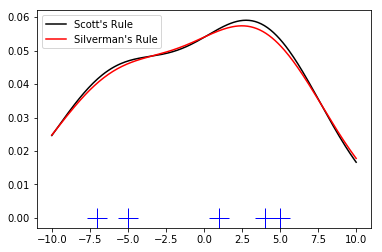

In [299]:
from scipy import stats
import matplotlib.pyplot as plt

x1 = np.array([-7, -5, 1, 4, 5], dtype=np.float)
kde1 = stats.gaussian_kde(x1)
kde2 = stats.gaussian_kde(x1, bw_method='silverman')

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x1, np.zeros(x1.shape), 'b+', ms=20)  # rug plot
x_eval = np.linspace(-10, 10, num=200)
ax.plot(x_eval, kde1(x_eval), 'k-', label="Scott's Rule")
ax.plot(x_eval, kde2(x_eval), 'r-', label="Silverman's Rule")
plt.legend()

plt.show()

We see that there is very little difference between Scott’s Rule and Silverman’s Rule, and that the bandwidth selection with a limited amount of data is probably a bit too wide. We can define our own bandwidth function to get a less smoothed out result.

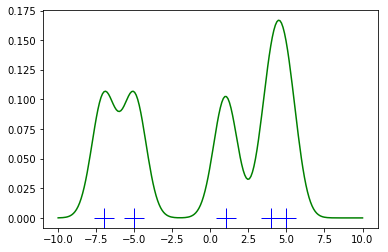

In [301]:
x1 = np.array([-7, -5, 1, 4, 5], dtype=float)
x_eval = np.linspace(-10, 10, num=200)
kde1 = stats.gaussian_kde(x1)
kde2 = stats.gaussian_kde(x1, bw_method='silverman')

def my_kde_bandwidth(obj, fac=1./5):
    """We use Scott's Rule, multiplied by a constant factor."""
    return np.power(obj.n, -1./(obj.d+4)) * fac

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(x1, np.zeros(x1.shape), 'b+', ms=20)  # rug plot

kde3 = stats.gaussian_kde(x1, bw_method=my_kde_bandwidth)
ax.plot(x_eval, kde3(x_eval), 'g-', label="With smaller BW")

plt.show()

We see that if we set bandwidth to be very narrow, the obtained estimate for the probability density function (PDF) is simply the ***sum of Gaussians*** around each data point.

We now take a more realistic example, and look at the difference between the two available bandwidth selection rules. Those rules are known to work well for (close to) normal distributions, but even for unimodal distributions that are quite strongly non-normal they work reasonably well. As a non-normal distribution we take a Student’s T distribution with 5 degrees of freedom.

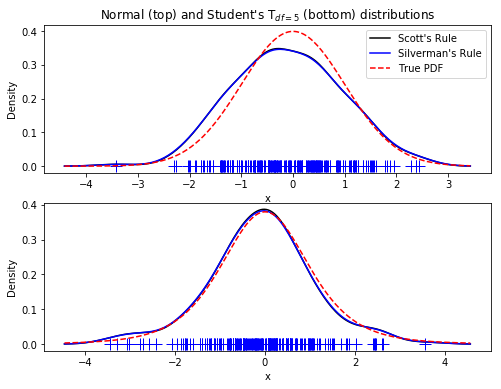

In [302]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


np.random.seed(12456)

# random data, normal distribution
x1 = np.random.normal(size=200)  
xs = np.linspace(x1.min()-1, x1.max()+1, 200)

kde1 = stats.gaussian_kde(x1)
kde2 = stats.gaussian_kde(x1, bw_method='silverman')

fig = plt.figure(figsize=(8, 6))

ax1 = fig.add_subplot(211)
ax1.plot(x1, np.zeros(x1.shape), 'b+', ms=12)  # rug plot
ax1.plot(xs, kde1(xs), 'k-', label="Scott's Rule")
ax1.plot(xs, kde2(xs), 'b-', label="Silverman's Rule")
ax1.plot(xs, stats.norm.pdf(xs), 'r--', label="True PDF")

ax1.set_xlabel('x')
ax1.set_ylabel('Density')
ax1.set_title("Normal (top) and Student's T$_{df=5}$ (bottom) distributions")
ax1.legend(loc=1)


# random data, T distribution
x2 = stats.t.rvs(5, size=200)  
xs = np.linspace(x2.min() - 1, x2.max() + 1, 200)

kde3 = stats.gaussian_kde(x2)
kde4 = stats.gaussian_kde(x2, bw_method='silverman')

ax2 = fig.add_subplot(212)
ax2.plot(x2, np.zeros(x2.shape), 'b+', ms=12)  # rug plot
ax2.plot(xs, kde3(xs), 'k-', label="Scott's Rule")
ax2.plot(xs, kde4(xs), 'b-', label="Silverman's Rule")
ax2.plot(xs, stats.t.pdf(xs, 5), 'r--', label="True PDF")

ax2.set_xlabel('x')
ax2.set_ylabel('Density')

plt.show()

We now take a look at a ***bimodal distribution*** with one wider and one narrower Gaussian feature. We expect that this will be a more difficult density to approximate, due to the different bandwidths required to accurately resolve each feature.

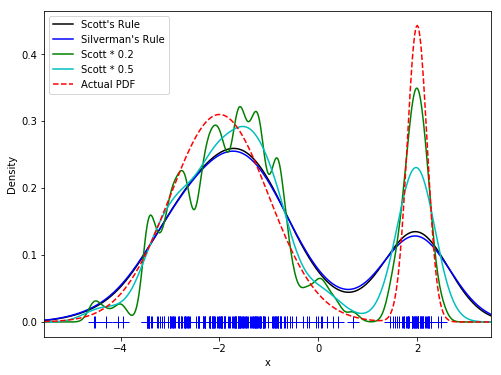

In [303]:
from functools import partial
from scipy import stats


def my_kde_bandwidth(obj, fac=1./5):
    """We use Scott's Rule, multiplied by a constant factor."""
    return np.power(obj.n, -1./(obj.d+4)) * fac


loc1, scale1, size1 = (-2, 1, 175)
loc2, scale2, size2 = (2, 0.2, 50)
x2 = np.concatenate([np.random.normal(loc=loc1, scale=scale1, size=size1),
                     np.random.normal(loc=loc2, scale=scale2, size=size2)])

x_eval = np.linspace(x2.min() - 1, x2.max() + 1, 500)

kde = stats.gaussian_kde(x2)
kde2 = stats.gaussian_kde(x2, bw_method='silverman')
kde3 = stats.gaussian_kde(x2, bw_method=partial(my_kde_bandwidth, fac=0.2))
kde4 = stats.gaussian_kde(x2, bw_method=partial(my_kde_bandwidth, fac=0.5))

pdf = stats.norm.pdf
bimodal_pdf = pdf(x_eval, loc=loc1, scale=scale1) * float(size1) / x2.size + \
              pdf(x_eval, loc=loc2, scale=scale2) * float(size2) / x2.size

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.plot(x2, np.zeros(x2.shape), 'b+', ms=12)  # rug plot
ax.plot(x_eval, kde(x_eval), 'k-', label="Scott's Rule")
ax.plot(x_eval, kde2(x_eval), 'b-', label="Silverman's Rule")
ax.plot(x_eval, kde3(x_eval), 'g-', label="Scott * 0.2")
ax.plot(x_eval, kde4(x_eval), 'c-', label="Scott * 0.5")
ax.plot(x_eval, bimodal_pdf, 'r--', label="Actual PDF")

ax.set_xlim([x_eval.min(), x_eval.max()])
ax.legend(loc=2)
ax.set_xlabel('x')
ax.set_ylabel('Density')

plt.show()

As expected, the KDE is not as close to the true PDF as we would like due to the different characteristic size of the two features of the bimodal distribution. By halving the default bandwidth (Scott * 0.5) we can do somewhat better, while using a factor 5 smaller bandwidth than the default doesn’t smooth enough. What we really need though in this case is a non-uniform (adaptive) bandwidth.

### Multivariate estimation

With gaussian_kde we can perform multivariate as well as univariate estimation. We demonstrate the ***bivariate*** case. First we generate some random data with a model in which the two variates are correlated.

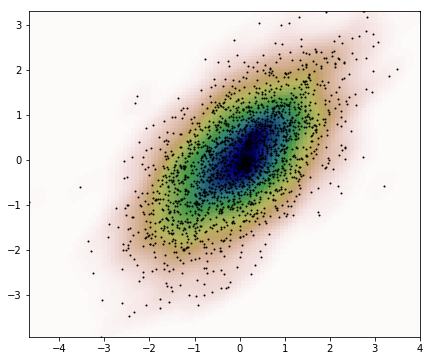

In [304]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


def measure(n):
    """Measurement model, return two coupled measurements."""
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5, size=n)
    return m1+m2, m1-m2

m1, m2 = measure(2000)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

# Then we apply the KDE to the data:

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])

kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel.evaluate(positions).T, X.shape)

# Finally we plot the estimated bivariate distribution as a colormap, 
# and plot the individual data points on top.

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])

ax.plot(m1, m2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

plt.show()